<a href="https://colab.research.google.com/github/oktaviacitra/data-mining/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from google.colab import drive
import seaborn as sns

# Connect to Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Dataset

In [ ]:
path = "/content/drive/MyDrive/Data Mining/transaction.csv"
dataset = pd.read_csv(path)
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


# Count Attributes

In [ ]:
countries = pd.Series(dataset['Country']).value_counts()
countries

Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Lithuania                  8
Brazil                     8
European Community         5
Lebanon                    5
Czech Republic             4
Bahrain       

In [ ]:
transactions = dataset.drop_duplicates(subset=['Country', 'InvoiceNo']).groupby('Country').count()[['InvoiceNo']]
transactions

,InvoiceNo
Country,
Australia,44
Austria,12
Bahrain,1
Belgium,84
Brazil,1
Canada,3
Channel Islands,21
Cyprus,16
Czech Republic,2


# Cluster

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = cluster.fit_predict(transactions)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
transactions = transactions.assign(label=clusters)
centroids = transactions.groupby('label').mean()
centroids

,InvoiceNo
label,
0,18.787879
1,360.500000
2,224.000000


In [ ]:
sorted = centroids.sort_values(by='InvoiceNo')
sorted

,InvoiceNo
label,
0,18.787879
2,224.000000
1,360.500000


In [ ]:
categories = ['Low', 'High', 'Middle']
for (i, value) in sorted.iterrows():
  print(categories[i])
  print(transactions.loc[transactions['label'] == i])

Low
                      InvoiceNo  label
Country                               
Australia                    44      0
Austria                      12      0
Bahrain                       1      0
Belgium                      84      0
Brazil                        1      0
Canada                        3      0
Channel Islands              21      0
Cyprus                       16      0
Czech Republic                2      0
Denmark                      18      0
European Community            3      0
Finland                      26      0
Greece                        5      0
Iceland                       6      0
Israel                        4      0
Italy                        31      0
Japan                        14      0
Lebanon                       1      0
Lithuania                     2      0
Malta                         2      0
Netherlands                  76      0
Norway                       28      0
Poland                       17      0
Portugal             

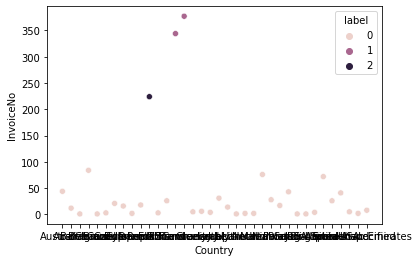

In [ ]:
sns.scatterplot(data=transactions, x="Country", y="InvoiceNo", hue="label")